# ADCP Assessment 2.1: Explore ADCP data on OOINet

Looking at available sensors, streams, and datasets from CGSN ADCPs in the gold copy in the kdata server. We'll open a few datasets to familiarize ourselves with the science parameters.

| Instrument Series | Model |
|-------------------|-------|
| ADCPT-F | Teledyne RDI WorkHorse Sentinel 150 kHz |
| ADCPT-G | Teledyne RDI WorkHorse Sentinel 150 kHz - inductive |
| ADCPS-J | Teledyne RDI WorkHorse LongRanger Sentinel 75 kHz |
| ADCPS-L | Teledyne RDI WorkHorse LongRanger Sentinel 75 kHz - inductive |
| ADCPS-N | Teledyne RDI WorkHorse LongRanger Sentinel 75 kHz - inductive |


In [1]:
# Import libraries needed in this notebook
import os

import numpy as np
import pandas as pd
import xarray as xr

# Import ooi-data-explorations functions
from ooi_data_explorations.common import list_sites, list_nodes, \
    list_sensors, list_methods, list_streams, list_deployments, load_kdata, \
    get_sensor_information, update_dataset, get_vocabulary

# Import ooinet functions

# Import qartod-testing functions

In [12]:
# Request a list of subsites
# list_sites()
list_nodes('CP11SOSM') # Central surface mooring at MAB

['MFC31',
 'MFD36',
 'MFD37',
 'RIC21',
 'RID26',
 'RID27',
 'SBC11',
 'SBD11',
 'SBD12']

In [11]:
# Request sensors at a node
list_sensors('CP11SOSM','MFD37')

['00-DCLENG000',
 '01-OPTAAD000',
 '02-ADCPTF000',
 '03-CTDBPD000',
 '04-DOSTAD000',
 '07-ZPLSCC000']

In [14]:
# Pick a refdes
site = 'CP11SOSM'
node = 'MFD37'
sensor = '02-ADCPTF000'

# Request data recovery methods for this refdes
list_methods(site, node, sensor)

['telemetered']

In [15]:
# Pick a method
method = 'telemetered'

# Request science data streams available for this method and refdes
list_streams(site, node, sensor, method)

['adcp_config', 'adcp_engineering', 'adcp_velocity_earth']

In [16]:
# Pick a data stream
stream = 'adcp_velocity_earth'

In [17]:
# Show deployments of this sensor
list_deployments(site, node, sensor)

[1]

In [18]:
# Retrieve vocab that might be used in background?
vocab = get_vocabulary(site, node, sensor)[0]
print(vocab)

{'@class': '.VocabRecord', 'vocabId': 1047, 'refdes': 'CP11SOSM-MFD37-02-ADCPTF000', 'instrument': 'Velocity Profiler (150kHz)', 'tocL1': 'Coastal Pioneer MAB', 'tocL2': 'Southern Surface Mooring', 'tocL3': 'Seafloor Multi-Function Node (MFN)', 'manufacturer': 'Teledyne RDI', 'model': 'WorkHorse Sentinel 150khz', 'mindepth': 99.0, 'maxdepth': 99.0}


In [22]:
# Import the dataset to the workspace
# If there are 15 deployments in the gold copy for CP04OSSM (not being deployed)
# I would think that we would only have 15 NetCDF files
adcp = load_kdata(site, node, sensor, method, stream, tag="*ADCP*.nc")

Loading and Processing Data Files: 100%|██████████| 17/17 [00:02<00:00,  8.03it/s]


In [7]:
# Apply post-processing to the data - not yet 
# (bring this cell down later when we try refining the dataset for QC)
# or don't do this until new notebook for trying different QC'ing processes

In [23]:
# Show dataset details to explore variables and attributes
adcp

<xarray.Dataset>
Dimensions:                          (time: 455, bin: 28)
Coordinates:
  * bin                              (bin) int32 0 1 2 3 4 5 ... 23 24 25 26 27
  * time                             (time) datetime64[ns] 2024-04-05T14:02:5...
Data variables: (12/44)
    corrected_echo_intensity_beam4   (time, bin) float64 73.8 72.0 ... 48.15
    num_cells                        (time) uint8 28 28 28 28 28 ... 28 28 28 28
    ensemble_number                  (time) uint16 33 35 37 39 ... 999 1001 1003
    transducer_depth                 (time) uint16 995 993 991 ... 995 996 994
    corrected_echo_intensity_beam3   (time, bin) float64 74.25 73.35 ... 45.9
    corrected_echo_intensity_beam2   (time, bin) float64 71.55 71.1 ... 43.2
    ...                               ...
    correlation_magnitude_beam2      (time, bin) uint8 136 122 131 ... 56 70 70
    correlation_magnitude_beam3      (time, bin) uint8 133 124 126 ... 65 70 68
    correlation_magnitude_beam1      (time, bin) uint8 131 124 127 ... 59 72 73
    echo_intensity_beam4             (time, bin) uint8 164 160 153 ... 126 107
    echo_intensity_beam3             (time, bin) uint8 165 163 157 ... 119 102
    echo_intensity_beam1             (time, bin) uint8 155 153 147 ... 112 96
Attributes: (12/69)
    node:                               MFD37
    comment:                            Data produced by the OOI M2M API and ...
    publisher_email:                    
    sourceUrl:                          http://oceanobservatories.org/
    collection_method:                  telemetered
    stream:                             adcp_velocity_earth
    ...                                 ...
    geospatial_lon_resolution:          0.1
    geospatial_vertical_units:          meters
    geospatial_vertical_resolution:     0.1
    geospatial_vertical_positive:       down
    lat:                                35.7281
    lon:                                -74.85118

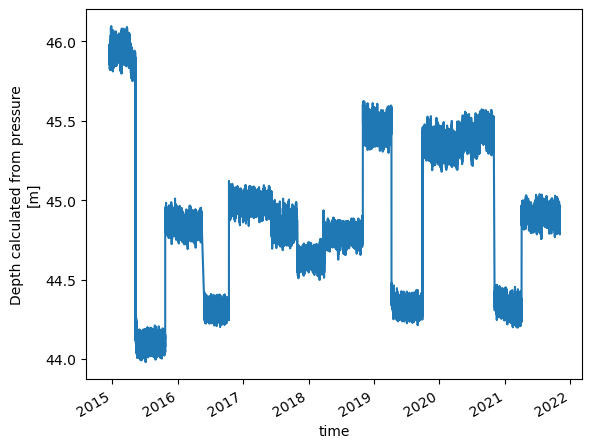

In [19]:
# plot depth parameter removing 2 "spikes" for now
depth = adcp["depth"].where(adcp["depth"]<2000).where(adcp["depth"]>40)
depth.plot()

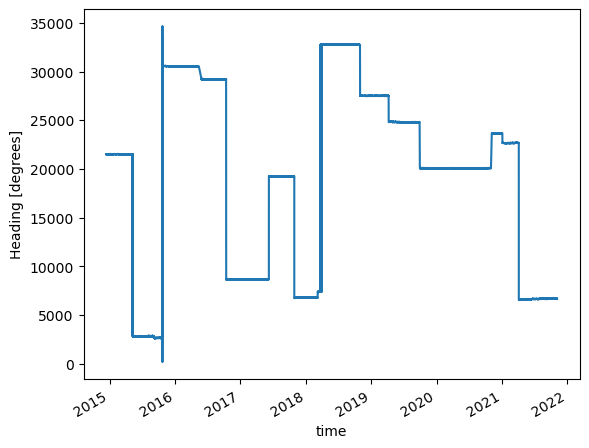

In [20]:
# plot heading parameter
adcp["heading"].plot()

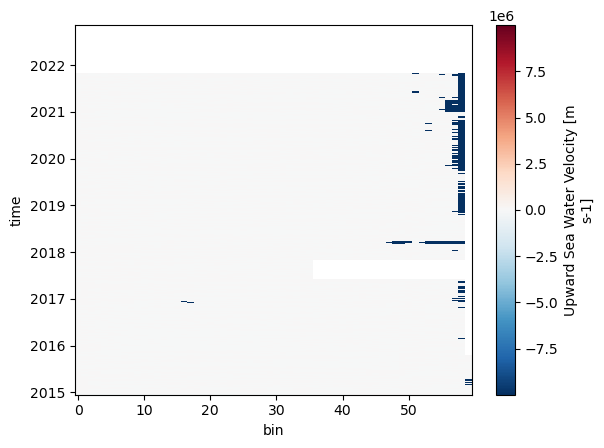

In [21]:
# plot upward velocity
adcp["upward_seawater_velocity"].plot()